In [1]:
import numpy as np
import random as random
import matplotlib.pyplot as plt
import time
import pandas as pd
import math
from scipy.spatial import distance
from scipy.stats import mode
from pyproj import Proj,transform
import seaborn as sns
import copy

# Average Farm Sizes (no. sheep and no. cow)

In [20]:
Data=pd.read_csv("All_data.txt",sep = '\t', header = 0)

In [60]:
cattle = round(np.mean(Data['cattle'].values))
sheep = round(np.mean(Data['sr'].values))
NumLivestock = cattle+sheep
# cattle

In [31]:
psi = 0.00657
# psi = 2.5
nu = 1.99*(10**(-4.8))
xi = 4.65
zeta = 2.80
chi = 0.403
phi = 0.799
rho = 0.000863
N =1
# epsilon = np.zeros(N)
s = np.random.negative_binomial(50, 50/55, N) #Draw latent periods (5 days)
r = np.random.negative_binomial(30, 30/38, N) #Draw infectious periods (8 days)
q = np.random.negative_binomial(2*28, 2*28/(4*28), N) #Draw immune periods (2 months)
v = np.random.negative_binomial(6*28, 6*28/(12*28))
tr = 2*np.ones(1)


In [57]:
NumLivestock

10.0

In [65]:
cattle = round(np.mean(Data['cattle'].values))
sheep = round(np.mean(Data['sr'].values))
t = 0
A = np.zeros(shape = (1, 10))
A[:,0] = -1 
I = 0
vac = 0

#initially one infected
initial = 0
I += 1
A[initial, ] = [initial, 0, s[initial], r[initial], tr[initial], q[initial], 0, 0, 0, 0]

infect_cow = 1
infect_sheep = 0
tmax = 500
λ = 0.1
μ = 0.01
InfectedTime = np.zeros(tmax)

while t < tmax:
    t = t+1
    print(t)
    infNum = 0

    ################################### WITHIN FARM INFECTION ####################################
    Num_livestock = infect_cow + infect_sheep
    inf = 1-((1-λ)**Num_livestock) 
    for animals in range(Num_livestock):

        p_beta = np.random.uniform(0,1)

        if (p_beta<inf) and (infect_sheep+infect_cow)<=Num_livestock:
            if (random.random() < 0.5 and sheep>=1 and infect_sheep<sheep):
                print('infect sheep')
                infect_sheep += 1
            elif (cattle>=1 and infect_cow<cattle):
                print('infect cow')
                infect_cow +=1


    #### WITHIN FARM RECOVERY ####
    infected = infect_cow+infect_sheep
    InfectedTime[t] = infected
    for animals in range(int(infect_cow+infect_sheep)):
        recover = np.random.uniform(0,1)

        if recover < μ and (infect_sheep+infect_cow) >=1 :
            if (random.random() <(infect_sheep/(infect_sheep+infect_cow)) and infect_sheep>=1 ):
                print('recover sheep')
                infect_sheep -= 1
            elif infect_cow>=1: 
                print('recover cow', infect_cow)
                infect_cow -=1
            if infect_sheep+infect_cow ==0: 
                I = 4
                infect_sheep= 0
                infect_cow= 0
                cattle= 0
                sheep = 0
                A[0, 6] = A[0, 5] +t
    ################################### end of each day #########################################

    if I == 4:
        InfectedTime[t+1] = 0
        break
    if t == (tmax-1):
        InfectedTime[t] = infect_cow + infect_sheep
        break


1
2
infect cow
3
4
infect sheep
5
infect cow
6
infect cow
7
infect sheep
8
infect cow
9
infect cow
10
infect cow
11
infect sheep
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
recover sheep
29
infect sheep
30
31
32
33
34
35
36
recover cow 7
37
infect cow
38
39
recover cow 7
40
infect cow
41
42
43
recover cow 7
44
infect cow
45
recover cow 7
46
infect cow
47
48
49
50
51
52
53
54
55
56
57
58
recover sheep
59
infect sheep
recover cow 7
60
infect cow
61
62
63
64
recover sheep
65
infect sheep
recover sheep
66
infect sheep
67
68
69
recover sheep
70
infect sheep
71
recover sheep
72
infect sheep
73
74
75
76
77
recover cow 7
78
infect cow
79
80
81
recover cow 7
recover cow 6
82
infect cow
83
infect cow
84
85
86
87
88
recover cow 7
89
infect cow
90
91
recover sheep
92
93
94
95
infect sheep
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
recover cow 7
129
infect cow
130
131
132
133
134
135
136
137
recover sheep
13

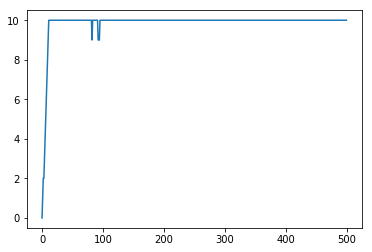

In [69]:
plt.plot(range(tmax), InfectedTime)
# plt.xlim([0,15])